In [1]:
%reload_ext autoreload
%autoreload 2

## This notebook aims to find the the optimized loss function for a line mapper and a loop mapper over multiple iterations. Also the loop size of the mappers are varied to test out the optimization.

### Create a loop mapper. Uses the `torus` function from ex_mapergraph.py file.
Arguments:
- `a` - int - the height of the bottom most vertex at the very bottom
- `b` - int - the height where the loop starts
- `c` - int - the height where the loop ends
- `d` - int - the height of the top most vertex at the very top
- `delta` - not needed
- `seed` - int - the seed for the random number generator

### Create a line mapper. Uses the `line` function from ex_mapergraph.py file.
Arguments:
- `a` - int - the height of the bottom most vertex at the very bottom
- `b` - int - the height of the top most vertex at the very top

In [31]:
import cereeberus.distance.ilp_solver_iterations as solver_iter
import matplotlib.pyplot as plt
import math

## run the iterations for n = 1, 2, 3, 4, 5, 6, 7...

In [ ]:
a = 0
b = 2
c = 13 # loop size is 11
d = 15

losses_dict = {}

for i in range(1, 7):
    losses_dict[f"losses_{i}"] = solver_iter.run_optimization_torus_line(a, b, c, d, i, 10)

# Save to a text file
with open("lt_losses_0_2_13_15_10.txt", "w") as file:
    for key, value in losses_dict.items():
        file.write(f"{key}: {value}\n")


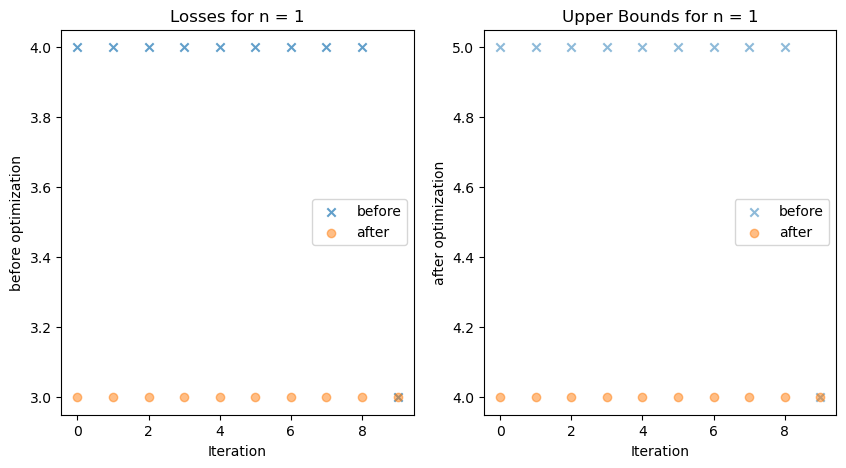

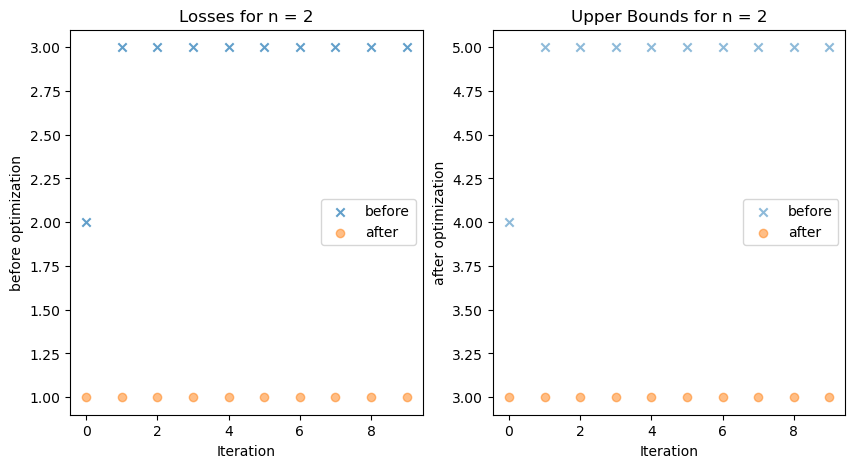

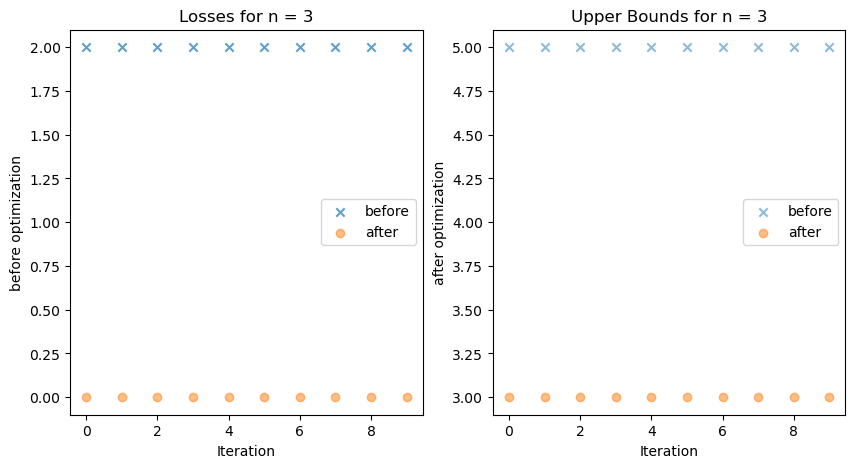

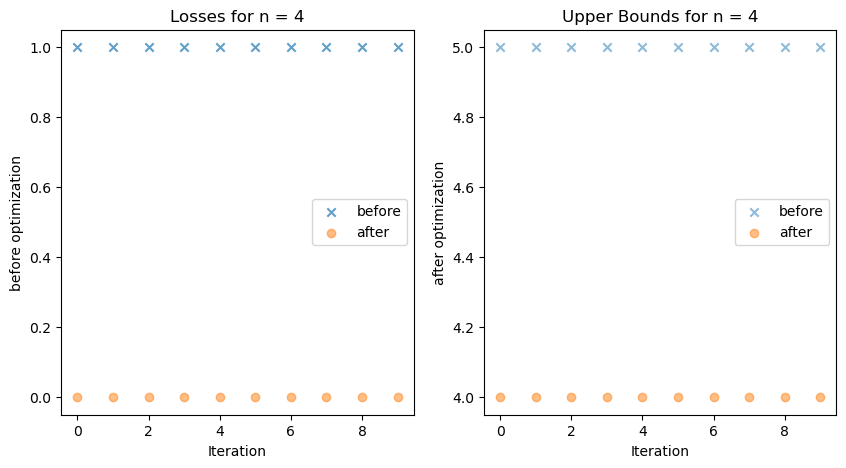

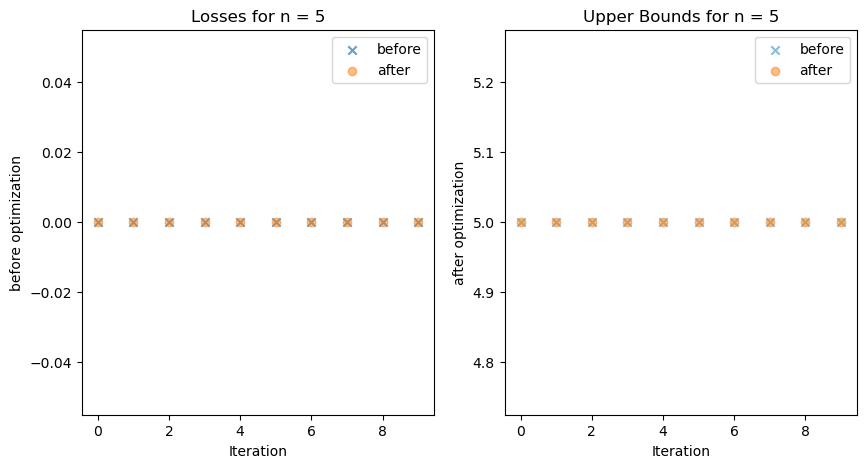

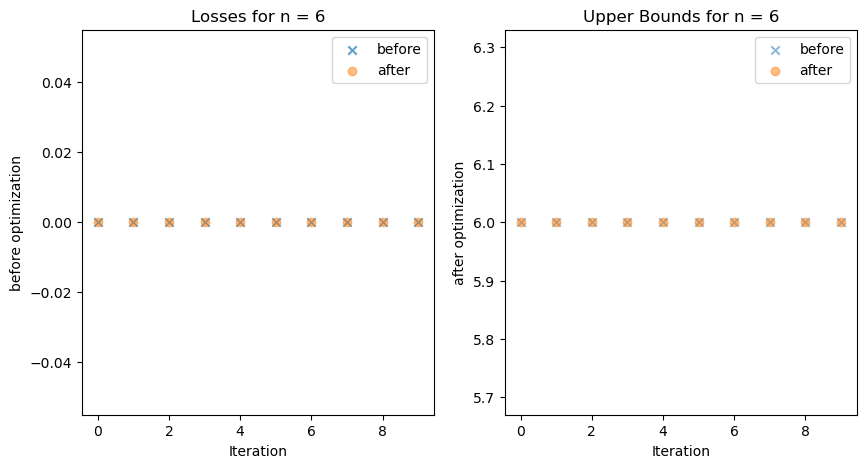

In [67]:

for i in range(1, 7):
    solver_iter.plot_losses_and_upper_bounds(losses_dict[f"losses_{i}"], i)


## Run 1000 iterations for one n value to evaluate the stability of the loss function.



In [79]:
a = 0
b = 2
c = 17 # loop size is 15
d = 20

n = 3 # thickening

loss_1_1000 = solver_iter.run_optimization_torus_line(a, b, c, d, n, 10)

# save to a text file
with open("lt_losses_0_2_17_20_1000.txt", "w") as file:
   file.write(f"losses_1_1000: {loss_1_1000}\n")

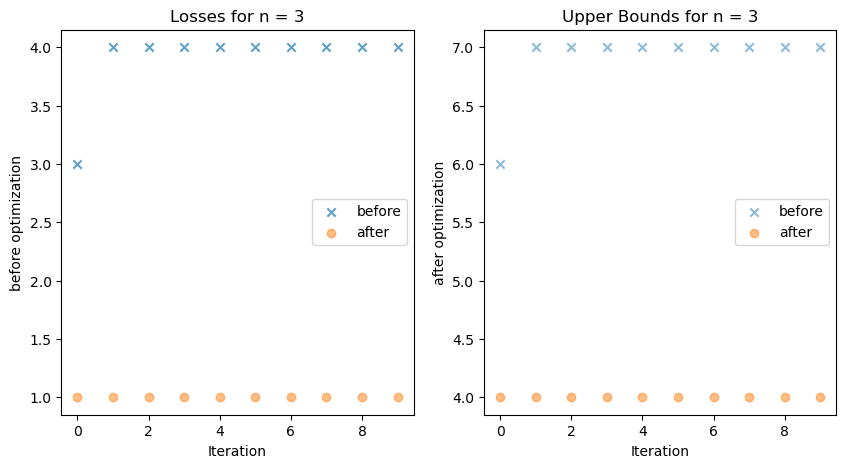

In [81]:
solver_iter.plot_losses_and_upper_bounds(loss_1_1000, 3)

# Relationship between the thickening parameter and the optimized loss function/upper bound

In [82]:
a = 0
b = 2
c = 30 # loop size is 28
d = 32

for i in range(1, 10):
    losses_dict[f"losses_{i}"] = solver_iter.run_optimization_torus_line(a, b, c, d, i, 1)

# Save to a text file
with open("lt_losses_0_2_30_32_1.txt", "w") as file:
    for key, value in losses_dict.items():
        file.write(f"{key}: {value}\n")

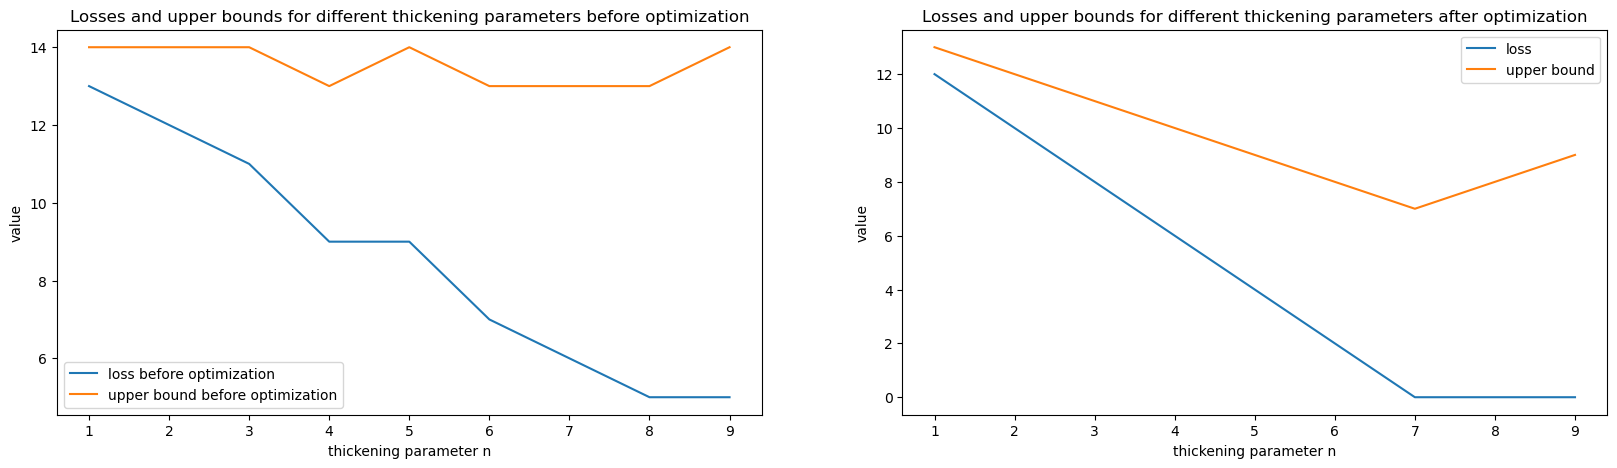

In [ ]:
# Plot the results


plt.figure(figsize=(20, 5))
plt.subplot(121)

plt.plot(range(1, 10), [losses_dict[f"losses_{i}"][0][0] for i in range(1, 10)], label="loss before optimization")
plt.plot(range(1, 10), [losses_dict[f"losses_{i}"][0][0]+i for i in range(1, 10)], label="upper bound before optimization")
plt.xlabel("thickening parameter n")
plt.ylabel("value")
plt.legend()
plt.title("Losses and upper bounds for different thickening parameters before optimization")
plt.subplot(122)
plt.plot(range(1, 10), [losses_dict[f"losses_{i}"][1][0] for i in range(1, 10)], label="loss")
plt.plot(range(1, 10), [losses_dict[f"losses_{i}"][1][0]+i for i in range(1, 10)], label="upper bound")
plt.xlabel("thickening parameter n")
plt.ylabel("value")
plt.legend()
plt.title("Losses and upper bounds for different thickening parameters after optimization")
plt.show()

# How does the loss change with change of loop size?

In [112]:
a = 0
b = 2

n =1
for i in range(4, 50):
    c = i
    d = i+2
    losses_dict[f"losses_{i}"] = solver_iter.run_optimization_torus_line(a, b, c, d, n, 1)

# Save to a text file
with open("lt_losses_0_2_x_x+2_1.txt", "w") as file:
    for key, value in losses_dict.items():
        file.write(f"{key}: {value}\n")

In [62]:
# Plot the results

def compute_loss_dict_diff_loopsize(largest_loop, n):
    a = 0
    b = 2
    c = range(4, largest_loop)
    losses_dict = {}

    for i in c:
        losses_dict[f"losses_{i}"] = solver_iter.run_optimization_torus_line(a, b, i, i+2, n, 1)

    return losses_dict

def plot_fig_diff_loopsize(largest_loop, n):

    losses_dict = compute_loss_dict_diff_loopsize(largest_loop, n)


    plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.step(range(2, largest_loop-2), [losses_dict[f"losses_{i}"][0][0] for i in range(4, largest_loop)], label="loss before optimization")
    plt.step(range(2, largest_loop-2), [losses_dict[f"losses_{i}"][0][0]+n for i in range(4, largest_loop)], label="upper bound before optimization")
    plt.xticks(range(2, largest_loop-2))
    plt.yticks(range(int(min([losses_dict[f"losses_{i}"][0][0] for i in range(4, largest_loop)])), 
                    int(max([losses_dict[f"losses_{i}"][0][0]+i for i in range(4, largest_loop)])) + 1))
    plt.step(range(2, largest_loop-2), [math.ceil(i/4) for i in range(2, largest_loop-2)], label="true interleaving")
    plt.xlabel("loop size")
    plt.ylabel("value")
    plt.legend()
    plt.title("Losses and upper bounds for different loop sizes before optimization")
    plt.subplot(122)
    plt.step(range(2, largest_loop-2), [losses_dict[f"losses_{i}"][1][0] for i in range(4, largest_loop)], label="loss")
    plt.step(range(2, largest_loop-2), [losses_dict[f"losses_{i}"][1][0]+n for i in range(4, largest_loop)], label="upper bound")
    plt.xticks(range(2, largest_loop-2))
    plt.yticks(range(int(min([losses_dict[f"losses_{i}"][1][0] for i in range(4, largest_loop)])), 
                    int(max([losses_dict[f"losses_{i}"][1][0]+i for i in range(4, largest_loop)])) + 1))
    plt.step(range(2, largest_loop-2), [math.ceil(i/4) for i in range(2,largest_loop-2)], label="true interleaving")
    plt.xlabel("loop size")
    plt.ylabel("value")
    plt.legend()
    plt.title("Losses and upper bounds for different loop sizes after optimization")
    plt.show()


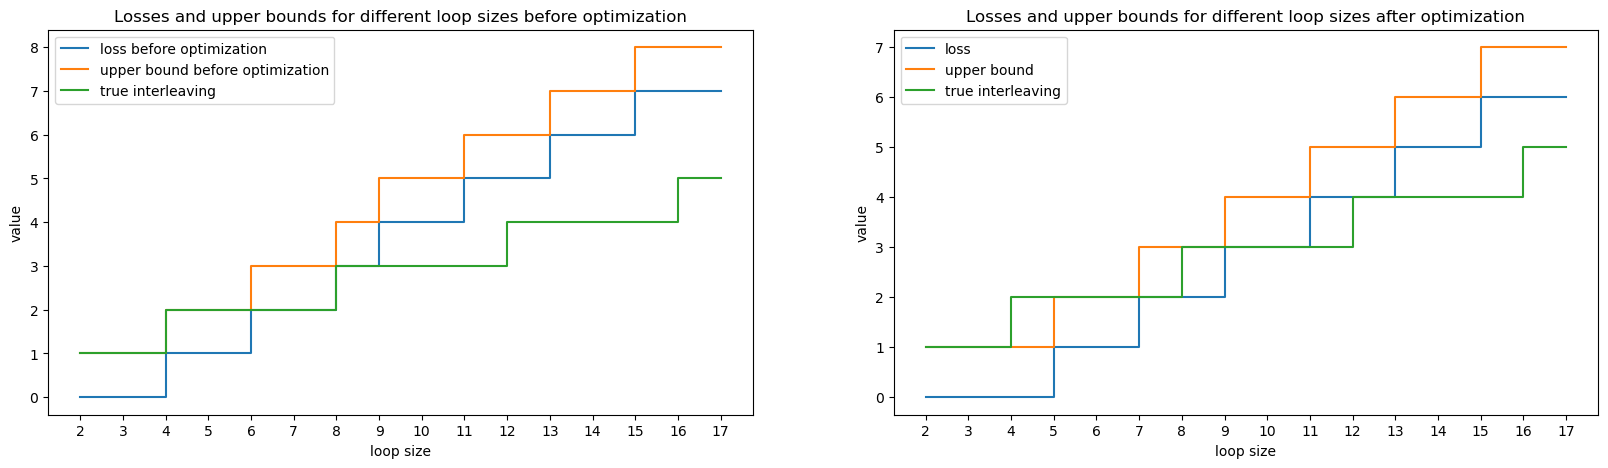

In [63]:
plot_fig_diff_loopsize(20, 1)

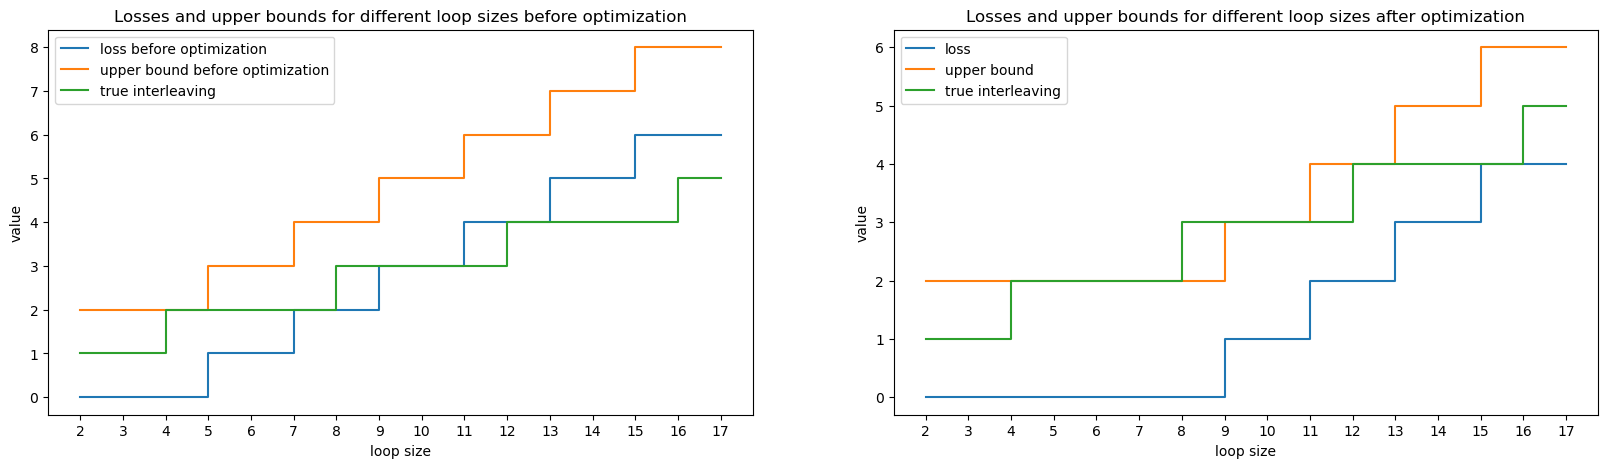

In [65]:
plot_fig_diff_loopsize(20,2)

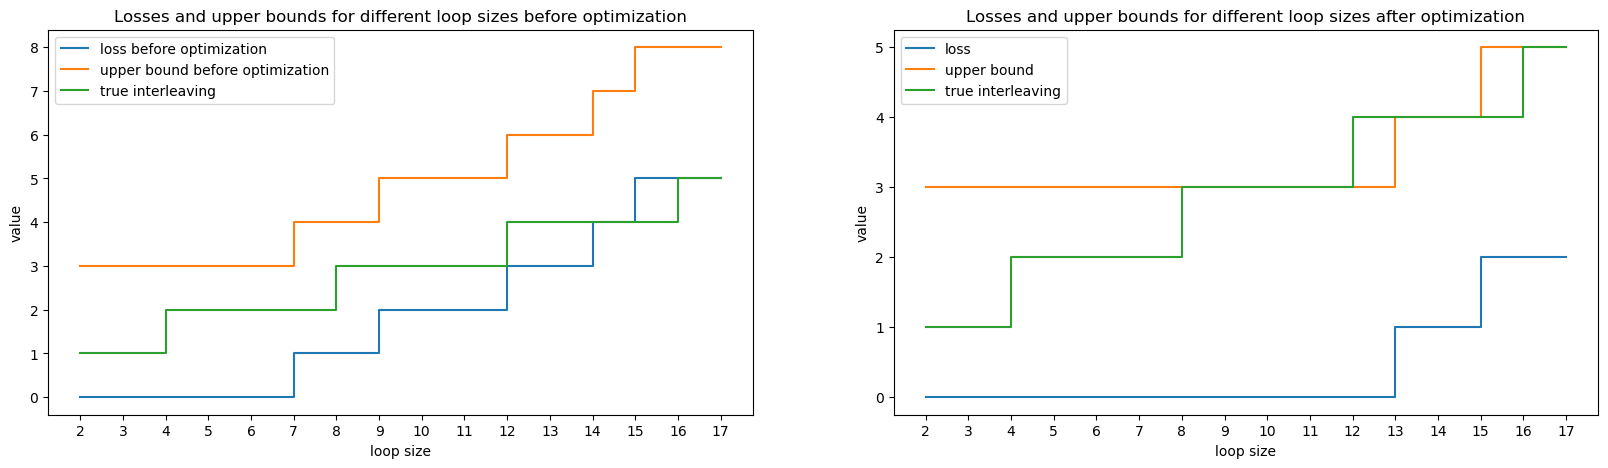

In [66]:
plot_fig_diff_loopsize(20,3)

### It scales (almost) linearly with the loop size.

## Questions:
- What is the relationship between the loss function and n value?
- why does the upper bound go down compared to the true interleaving in certeain situations? (something to do with the ceiling funciton)
